In [1]:
import tobii_research as tr

def get_tracker():
  all_eyetrackers = tr.find_all_eyetrackers()

  for tracker in all_eyetrackers:
    print("Model: " + tracker.model)
    print("Serial number: " + tracker.serial_number) 
    print(f"Can stream eye images: {tr.CAPABILITY_HAS_EYE_IMAGES in tracker.device_capabilities}")
    print(f"Can stream gaze data: {tr.CAPABILITY_HAS_GAZE_DATA in tracker.device_capabilities}")
    return tracker

tracker = get_tracker()
tracker

Model: Tobii Pro Fusion
Serial number: TPFC6-010203104285
Can stream eye images: True
Can stream gaze data: True


In [33]:
import time

def gaze_data_callback(gaze_data):
  global global_gaze_data
  global_gaze_data = gaze_data
  
def gaze_data(eyetracker, wait_time=5):
  global global_gaze_data

  print("Getting data...")
  eyetracker.subscribe_to(tr.EYETRACKER_GAZE_DATA, gaze_data_callback, as_dictionary=True)

  time.sleep(wait_time)

  eyetracker.unsubscribe_from(tr.EYETRACKER_GAZE_DATA, gaze_data_callback)

  return global_gaze_data
  
data = gaze_data(tracker)
data

Getting data...


{'device_time_stamp': 9833038023,
 'system_time_stamp': 228428882743,
 'left_gaze_point_on_display_area': (nan, nan),
 'left_gaze_point_in_user_coordinate_system': (nan, nan, nan),
 'left_gaze_point_validity': 0,
 'left_pupil_diameter': nan,
 'left_pupil_validity': 0,
 'left_gaze_origin_in_user_coordinate_system': (nan, nan, nan),
 'left_gaze_origin_in_trackbox_coordinate_system': (nan, nan, nan),
 'left_gaze_origin_validity': 0,
 'right_gaze_point_on_display_area': (nan, nan),
 'right_gaze_point_in_user_coordinate_system': (nan, nan, nan),
 'right_gaze_point_validity': 0,
 'right_pupil_diameter': nan,
 'right_pupil_validity': 0,
 'right_gaze_origin_in_user_coordinate_system': (nan, nan, nan),
 'right_gaze_origin_in_trackbox_coordinate_system': (nan, nan, nan),
 'right_gaze_origin_validity': 0}

In [3]:
from tobii_research import DisplayArea

def get_and_set_display_area(eyetracker):
  display_area = eyetracker.get_display_area()

  print("Got display area from tracker with serial number {0}:".format(eyetracker.serial_number))

  print("Bottom Left: {0}".format(display_area.bottom_left))
  print("Bottom Right: {0}".format(display_area.bottom_right))
  print("Height: {0}".format(display_area.height))
  print("Top Left: {0}".format(display_area.top_left))
  print("Top Right: {0}".format(display_area.top_right))
  print("Width: {0}".format(display_area.width))

  # To set the display area it is possible to either use a previously saved instance of
  # the class Display area, or create a new one as shown bellow.
  new_display_area_dict = dict()
  new_display_area_dict['top_left'] = display_area.top_left
  new_display_area_dict['top_right'] = display_area.top_right
  new_display_area_dict['bottom_left'] = display_area.bottom_left

  new_display_area = DisplayArea(new_display_area_dict)

  eyetracker.set_display_area(new_display_area)
  
  
get_and_set_display_area(tracker)

Got display area from tracker with serial number TPFC6-010203104285:
Bottom Left: (-94.33427429199219, 8.118664741516113, -7.686825275421143)
Bottom Right: (94.33427429199219, 8.118664741516113, -7.686825275421143)
Height: 117.9178447868923
Top Left: (-94.33427429199219, 118.9251937866211, 32.64345169067383)
Top Right: (94.33427429199219, 118.9251937866211, 32.64345169067383)
Width: 188.66854858398438


In [3]:
import time

def eye_img_data_callback(eye_data):
  global global_eye
  global_eye = eye_data
  
def eye_img_data(eyetracker, wait_time=0.5):
  global global_eye

  eyetracker.subscribe_to(tr.EYETRACKER_EYE_IMAGES, eye_img_data_callback, as_dictionary=True)

  time.sleep(wait_time)

  eyetracker.unsubscribe_from(tr.EYETRACKER_EYE_IMAGES, eye_img_data_callback)

  return global_eye

data = eye_img_data(tracker)
data

{'device_time_stamp': 9833984259,
 'system_time_stamp': 242771898323,
 'camera_id': 0,
 'top': 0,
 'left': 0,
 'region_id': 0,
 'image_type': 'eye_image_type_full',
 'image_data': b'GIF87a\x18\x01\x18\x01\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x03\x03\x03\x04\x04\x04\x05\x05\x05\x06\x06\x06\x07\x07\x07\x08\x08\x08\t\t\t\n\n\n\x0b\x0b\x0b\x0c\x0c\x0c\r\r\r\x0e\x0e\x0e\x0f\x0f\x0f\x10\x10\x10\x11\x11\x11\x12\x12\x12\x13\x13\x13\x14\x14\x14\x15\x15\x15\x16\x16\x16\x17\x17\x17\x18\x18\x18\x19\x19\x19\x1a\x1a\x1a\x1b\x1b\x1b\x1c\x1c\x1c\x1d\x1d\x1d\x1e\x1e\x1e\x1f\x1f\x1f   !!!"""###$$$%%%&&&\'\'\'((()))***+++,,,---...///000111222333444555666777888999:::;;;<<<===>>>???@@@AAABBBCCCDDDEEEFFFGGGHHHIIIJJJKKKLLLMMMNNNOOOPPPQQQRRRSSSTTTUUUVVVWWWXXXYYYZZZ[[[\\\\\\]]]^^^___```aaabbbcccdddeeefffggghhhiiijjjkkklllmmmnnnooopppqqqrrrssstttuuuvvvwwwxxxyyyzzz{{{|||}}}~~~\x7f\x7f\x7f\x80\x80\x80\x81\x81\x81\x82\x82\x82\x83\x83\x83\x84\x84\x84\x85\x85\x85\x86\x86\x86\x87\x87\x87\x88\x88\x88\x89\x8

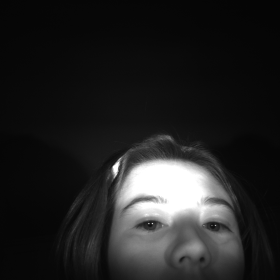

In [42]:
from IPython.display import Image, display
from io import BytesIO
from PIL import Image as PILImage

image_io = BytesIO(data['image_data'])
image = PILImage.open(image_io)

display(Image(data=image_io.getvalue()))
# image.save("rendered_image.gif", "GIF")

In [ ]:
# build dataset

# record watch a lecture intently


# record watching a lecture not intently

In [19]:
def combine_dicts_with_labels(dict_list):
    combined_dict = {}
    for i, dictionary in enumerate(dict_list, start=1):
        label = f"timestep_{i}"
        combined_dict[label] = dictionary

    return combined_dict


In [21]:
data = gaze_data(tracker, 2)
data2 = gaze_data(tracker, 2)

dict_list = [data, data2, data2]
tot_dict = combine_dicts_with_labels(dict_list)

Getting data...
Getting data...


In [32]:
import math
import pandas as pd

def build_dataset(tracker, label, add_on = False, df_orig = pd.DataFrame(), time_step_sec = 0.5, tot_time_min = 0.1):
    intervals = math.ceil((tot_time_min * 60) / time_step_sec)
    dict_list = []
    
    for _ in range(intervals):
        data = gaze_data(tracker, time_step_sec)
        dict_list.append(data)
    
    tot_dict = combine_dicts_with_labels(dict_list)
    df = pd.DataFrame(tot_dict).T
    df['type'] = label
        
    if add_on:
        df_new = pd.concat([df_orig, df])
        df_new = df_new.reset_index(drop=True)
        return df_new
    
    else:
        return df

        
build_dataset(tracker, 'test', add_on = True, df_orig = df) 

Getting data...
Getting data...
Getting data...
Getting data...
Getting data...
Getting data...
Getting data...
Getting data...
Getting data...
Getting data...
Getting data...
Getting data...


,device_time_stamp,system_time_stamp,left_gaze_point_on_display_area,left_gaze_point_in_user_coordinate_system,left_gaze_point_validity,left_pupil_diameter,left_pupil_validity,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_in_trackbox_coordinate_system,left_gaze_origin_validity,right_gaze_point_on_display_area,right_gaze_point_in_user_coordinate_system,right_gaze_point_validity,right_pupil_diameter,right_pupil_validity,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_in_trackbox_coordinate_system,right_gaze_origin_validity,type
0,7722810657,226318671221,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,NaN
1,7724819086,226320679578,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,NaN
2,7724819086,226320679578,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,NaN
3,9141757101,227737606570,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,test
4,9142257126,227738106370,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,test
5,9142257126,227738106370,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,test
6,9143290500,227739139781,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,test
7,9143807189,227739656548,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,test
8,9144307213,227740156583,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,test
9,9144307213,227740156583,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,test


In [22]:

df = pd.DataFrame(tot_dict).T
df

,device_time_stamp,system_time_stamp,left_gaze_point_on_display_area,left_gaze_point_in_user_coordinate_system,left_gaze_point_validity,left_pupil_diameter,left_pupil_validity,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_in_trackbox_coordinate_system,left_gaze_origin_validity,right_gaze_point_on_display_area,right_gaze_point_in_user_coordinate_system,right_gaze_point_validity,right_pupil_diameter,right_pupil_validity,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_in_trackbox_coordinate_system,right_gaze_origin_validity
timestep_1,7722810657,226318671221,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0
timestep_2,7724819086,226320679578,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0
timestep_3,7724819086,226320679578,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0


In [29]:
df

,device_time_stamp,system_time_stamp,left_gaze_point_on_display_area,left_gaze_point_in_user_coordinate_system,left_gaze_point_validity,left_pupil_diameter,left_pupil_validity,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_in_trackbox_coordinate_system,left_gaze_origin_validity,right_gaze_point_on_display_area,right_gaze_point_in_user_coordinate_system,right_gaze_point_validity,right_pupil_diameter,right_pupil_validity,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_in_trackbox_coordinate_system,right_gaze_origin_validity
timestep_1,7722810657,226318671221,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0
timestep_2,7724819086,226320679578,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0
timestep_3,7724819086,226320679578,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)","(nan, nan, nan)",0


In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def plot_circles(radius1, radius2):

    fig, ax = plt.subplots()

    circle1 = Circle((3, 1), radius1, fill=True, color='#415A6A', linewidth=2)
    circle2 = Circle((10, 1), radius2, fill=True, color='#51416A', linewidth=2)

    ax.add_patch(circle1)
    ax.add_patch(circle2)

    ax.set_xlim(-2, 15)
    ax.set_ylim(-6, 6)

    ax.set_aspect('equal')

    ax.text(0, -4, f"Left diameter: {radius1}", fontsize=12, color='red')
    ax.text(0, -5, f"Right diameter: {radius2}", fontsize=12, color='blue')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.show()

In [28]:
import pandas as pd

df = pd.read_csv('sample.csv')
df.head()

,Unnamed: 0,device_time_stamp,system_time_stamp,left_gaze_point_on_display_area,left_gaze_point_in_user_coordinate_system,left_gaze_point_validity,left_pupil_diameter,left_pupil_validity,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_in_trackbox_coordinate_system,left_gaze_origin_validity,right_gaze_point_on_display_area,right_gaze_point_in_user_coordinate_system,right_gaze_point_validity,right_pupil_diameter,right_pupil_validity,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_in_trackbox_coordinate_system,right_gaze_origin_validity,type
0,timestep_1,18299386371,265503970182,"(0.3193087875843048, 0.676091194152832)","(-34.090755462646484, 44.009883880615234, 5.37...",1,5.579056,1,"(-49.60303497314453, -7.409631252288818, 574.3...","(0.6185583472251892, 0.5173994302749634, 0.290...",1,"(0.318297415971756, 0.6574774980545044)","(-34.28156280517578, 46.072391510009766, 6.127...",1,4.976593,1,"(10.84681224822998, -4.016086578369141, 566.69...","(0.47392216324806213, 0.5088096261024475, 0.26...",1,user
1,timestep_2,18299386371,265503970182,"(0.3193087875843048, 0.676091194152832)","(-34.090755462646484, 44.009883880615234, 5.37...",1,5.579056,1,"(-49.60303497314453, -7.409631252288818, 574.3...","(0.6185583472251892, 0.5173994302749634, 0.290...",1,"(0.318297415971756, 0.6574774980545044)","(-34.28156280517578, 46.072391510009766, 6.127...",1,4.976593,1,"(10.84681224822998, -4.016086578369141, 566.69...","(0.47392216324806213, 0.5088096261024475, 0.26...",1,user
2,timestep_3,18299386371,265503970182,"(0.3193087875843048, 0.676091194152832)","(-34.090755462646484, 44.009883880615234, 5.37...",1,5.579056,1,"(-49.60303497314453, -7.409631252288818, 574.3...","(0.6185583472251892, 0.5173994302749634, 0.290...",1,"(0.318297415971756, 0.6574774980545044)","(-34.28156280517578, 46.072391510009766, 6.127...",1,4.976593,1,"(10.84681224822998, -4.016086578369141, 566.69...","(0.47392216324806213, 0.5088096261024475, 0.26...",1,user
3,timestep_4,18299386371,265503970182,"(0.3193087875843048, 0.676091194152832)","(-34.090755462646484, 44.009883880615234, 5.37...",1,5.579056,1,"(-49.60303497314453, -7.409631252288818, 574.3...","(0.6185583472251892, 0.5173994302749634, 0.290...",1,"(0.318297415971756, 0.6574774980545044)","(-34.28156280517578, 46.072391510009766, 6.127...",1,4.976593,1,"(10.84681224822998, -4.016086578369141, 566.69...","(0.47392216324806213, 0.5088096261024475, 0.26...",1,user
4,timestep_5,18299386371,265503970182,"(0.3193087875843048, 0.676091194152832)","(-34.090755462646484, 44.009883880615234, 5.37...",1,5.579056,1,"(-49.60303497314453, -7.409631252288818, 574.3...","(0.6185583472251892, 0.5173994302749634, 0.290...",1,"(0.318297415971756, 0.6574774980545044)","(-34.28156280517578, 46.072391510009766, 6.127...",1,4.976593,1,"(10.84681224822998, -4.016086578369141, 566.69...","(0.47392216324806213, 0.5088096261024475, 0.26...",1,user


In [29]:
from utils import get_gazepoints

df = get_gazepoints(df)
df = get_gazepoints(df, "right")
df.head()

,Unnamed: 0,device_time_stamp,system_time_stamp,left_gaze_point_validity,left_pupil_diameter,left_pupil_validity,left_gaze_origin_validity,right_gaze_point_validity,right_pupil_diameter,right_pupil_validity,right_gaze_origin_validity,type,x_left,y_left,x_right,y_right
0,timestep_1,18299386371,265503970182,1,5.579056,1,1,1,4.976593,1,1,user,0.3193087875843048,0.676091194152832,0.318297415971756,0.6574774980545044
1,timestep_2,18299386371,265503970182,1,5.579056,1,1,1,4.976593,1,1,user,0.3193087875843048,0.676091194152832,0.318297415971756,0.6574774980545044
2,timestep_3,18299386371,265503970182,1,5.579056,1,1,1,4.976593,1,1,user,0.3193087875843048,0.676091194152832,0.318297415971756,0.6574774980545044
3,timestep_4,18299386371,265503970182,1,5.579056,1,1,1,4.976593,1,1,user,0.3193087875843048,0.676091194152832,0.318297415971756,0.6574774980545044
4,timestep_5,18299386371,265503970182,1,5.579056,1,1,1,4.976593,1,1,user,0.3193087875843048,0.676091194152832,0.318297415971756,0.6574774980545044


In [38]:
df['x_left'].value_counts()

0.3193087875843048    60
Name: x_left, dtype: int64

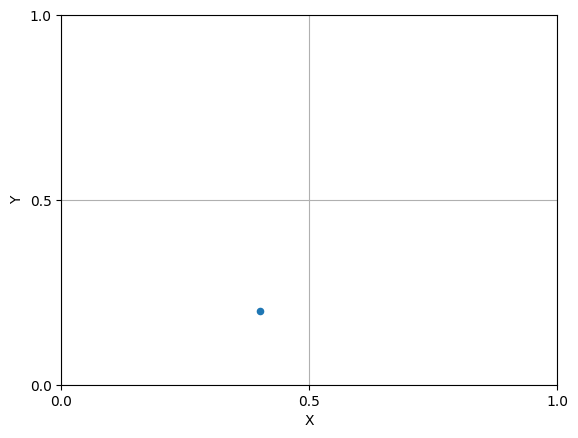

In [46]:
plt.scatter(0.4, 0.2, s=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)

plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])

plt.show()

In [43]:
float(df['x_left'].iloc[0])

0.3193087875843048

In [45]:
plt.scatter(float(df['x_left']), float(df['y_left']))
plt.scatter(float(df['x_right']), float(df['y_right']))
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)

plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])

plt.show()

TypeError: cannot convert the series to <class 'float'>